###             Water Quality

### Veri Seti:
https://www.kaggle.com/datasets/adityakadiwal/water-potability

In [1]:
import pandas as pd #dataframeler ve seriler uzerindeki islemler icin
import numpy as np #sayisal islemlerim icin
import joblib

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('WaterPotability.csv')
print(df)

            ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.88535

In [3]:
df.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [4]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [5]:
df.isna() #isna ile soru sordum null degerleri goruntuledim, true null

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
3271,False,False,False,False,False,False,False,False,False,False
3272,False,False,False,False,True,False,False,True,False,False
3273,False,False,False,False,True,False,False,False,False,False
3274,False,False,False,False,True,False,False,False,False,False


Veri setinde ph sütununda 491, sulfate'ta 781, trihalomethanes sütununda 162 eksik veri bulunmaktadır.

In [6]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Toplamda ise 1434 veri eksiktir.

In [7]:
df.isna().sum().sum()

1434

In [8]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [9]:
df.count()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability         3276
dtype: int64

In [10]:
df.shape #satir sutun sayisini gosterir. shape[0] satiri shape 1 sutunu gosterir

(3276, 10)

In [11]:
df['Potability'].unique() #potabilitydeki unique(essiz) degerleri gosterdimb

array([0, 1], dtype=int64)


İçilebilir nitelikleri içilebilir satırlara göre doldurmanın daha mantıklı olacağından dolayı; Sınıf + Nitelik Bazlı Tamamlama Yapacağım.

In [12]:
df[df['Potability']==0]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3112,6.616731,195.096968,34277.760400,7.632639,NaN,417.465080,13.432557,47.945936,3.622379,0
3113,7.734569,230.919506,21776.594455,6.908591,NaN,395.114961,15.033557,92.697369,3.821456,0
3114,6.971577,185.906938,27959.987873,7.214510,349.743879,414.067354,19.882917,36.179003,3.226349,0
3115,4.709187,179.141018,22291.418577,6.774276,407.417977,371.264843,18.186801,86.528627,3.860084,0


Tablolarımı sınıf değerlerine göre 2(sınıf sayısı) ayrı tabloya ayırdım. En son birleştireceğim.

In [13]:
df0=df[df['Potability']==0]

In [14]:
df1=df[df['Potability']==1]

In [15]:
df0.shape

(1998, 10)

In [16]:
df1.shape

(1278, 10)

In [17]:
df0.isna().sum()

ph                 314
Hardness             0
Solids               0
Chloramines          0
Sulfate            488
Conductivity         0
Organic_carbon       0
Trihalomethanes    107
Turbidity            0
Potability           0
dtype: int64

In [18]:
df1.isna().sum()

ph                 177
Hardness             0
Solids               0
Chloramines          0
Sulfate            293
Conductivity         0
Organic_carbon       0
Trihalomethanes     55
Turbidity            0
Potability           0
dtype: int64

In [19]:
import statistics as st

In [20]:
st.mode(df0['ph'])

nan

Mod ile tamamlama yapamıyorum, çünkü en çok tekrar eden değer NULL muş. 

Medyan yöntemi ile tamamlama yapacağım. Çünkü medyan ortanca değeri vereceği için ve ortalama kullansaydım da aykırı değer varsa çok iyi bir sonuç alacağımı düşünmediğim için bu yönteme karar verdim. 
 

In [21]:
st.median(df0['Sulfate'])

nan

In [22]:
df0.iloc[999] #1998 veri var ortanca degerine baktığımda (999.) aynı sonucu mu veriyor diye kontrol ettim.

ph                     7.362331
Hardness             215.637255
Solids             28263.310638
Chloramines            6.478948
Sulfate                     NaN
Conductivity         417.608214
Organic_carbon        16.552543
Trihalomethanes       56.399346
Turbidity              3.933565
Potability             0.000000
Name: 1479, dtype: float64

Ancak Medyan ile yaptığımdaysa ortanca değerim NULL olabilir. 
### Bu sebeple Ortalama ile yapmaya karar verdim.

ph, Sulfate, Trihalomethanes NULL değeri içeren niteliklerim. Bunları dolduracağım.

In [23]:
df0.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,1684.000000,1998.000000,1998.000000,1998.000000,1510.000000,1998.000000,1998.000000,1891.000000,1998.000000,1998.0
mean,7.085378,196.733292,21777.490788,7.092175,334.564290,426.730454,14.364335,66.303555,3.965800,0.0
std,1.683499,31.057540,8543.068788,1.501045,36.745549,80.047317,3.334554,16.079320,0.780282,0.0
min,0.000000,98.452931,320.942611,1.683993,203.444521,181.483754,4.371899,0.738000,1.450000,0.0
25%,6.037723,177.823265,15663.057382,6.155640,311.264006,368.498530,12.101057,55.706530,3.444062,0.0
50%,7.035456,197.123423,20809.618280,7.090334,333.389426,422.229331,14.293508,66.542198,3.948076,0.0
75%,8.155510,216.120687,27006.249009,8.066462,356.853897,480.677198,16.649485,77.277704,4.496106,0.0
max,14.000000,304.235912,61227.196008,12.653362,460.107069,753.342620,28.300000,120.030077,6.739000,0.0


In [24]:
ph0=df0['ph'].mean() #ortalama
ph0

7.085378435983544

In [25]:
sulfate0=df0['Sulfate'].mean()
sulfate0

334.5642895786881

In [26]:
triha0=df0['Trihalomethanes'].mean()
triha0

66.30355527306088

In [27]:
df0.fillna(value= {'ph':ph0, 'Sulfate':sulfate0, 'Trihalomethanes':triha0}, inplace=True) #fillna ile bos satirlarin hepsini dolduruyorum
df0 #inplace:kalici olmadisini sagliyo. tekrar atamak yerine kullaniyoruz

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.085378,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,334.564290,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,334.564290,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3112,6.616731,195.096968,34277.760400,7.632639,334.564290,417.465080,13.432557,47.945936,3.622379,0
3113,7.734569,230.919506,21776.594455,6.908591,334.564290,395.114961,15.033557,92.697369,3.821456,0
3114,6.971577,185.906938,27959.987873,7.214510,349.743879,414.067354,19.882917,36.179003,3.226349,0
3115,4.709187,179.141018,22291.418577,6.774276,407.417977,371.264843,18.186801,86.528627,3.860084,0


In [28]:
df0.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [29]:
df1.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,1101.000000,1278.000000,1278.000000,1278.000000,985.000000,1278.000000,1278.000000,1223.000000,1278.000000,1278.0
mean,7.073783,195.800744,22383.991018,7.169338,332.566990,425.383800,14.160893,66.539684,3.968328,1.0
std,1.448048,35.547041,9101.010208,1.702988,47.692818,82.048446,3.263907,16.327419,0.780842,0.0
min,0.227499,47.432000,728.750830,0.352000,129.000000,201.619737,2.200000,8.175876,1.492207,1.0
25%,6.179312,174.330531,15668.985035,6.094134,300.763772,360.939023,12.033897,56.014249,3.430909,1.0
50%,7.036752,196.632907,21199.386614,7.215163,331.838167,420.712729,14.162809,66.678214,3.958576,1.0
75%,7.933068,218.003420,27973.236446,8.199261,365.941346,484.155911,16.356245,77.380975,4.509569,1.0
max,13.175402,323.124000,56488.672413,13.127000,481.030642,695.369528,23.604298,124.000000,6.494249,1.0


In [64]:
columns_to_drop = ['ph', 'Sulfate']
df_dropped = df.dropna (subset=columns_to_drop)
print(df_dropped)

             ph    Hardness        Solids  Chloramines     Sulfate  \
3      8.316766  214.373394  22018.417441     8.059332  356.886136   
4      9.092223  181.101509  17978.986339     6.546600  310.135738   
5      5.584087  188.313324  28748.687739     7.544869  326.678363   
6     10.223862  248.071735  28749.716544     7.513408  393.663396   
7      8.635849  203.361523  13672.091764     4.563009  303.309771   
...         ...         ...           ...          ...         ...   
3267   8.989900  215.047358  15921.412018     6.297312  312.931022   
3268   6.702547  207.321086  17246.920347     7.708117  304.510230   
3269  11.491011   94.812545  37188.826022     9.263166  258.930600   
3270   6.069616  186.659040  26138.780191     7.747547  345.700257   
3271   4.668102  193.681735  47580.991603     7.166639  359.948574   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
3       363.266516       18.436524       100.341674   4.628771           0  
4    

In [65]:
df0.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [68]:
df0['ph_category'] = df0['ph'].apply(lambda x: 'Asidik' if x < 7 else ('Bazik' if x > 7 else 'Nötr'))

# Sonucu gösterme
print(df0[['ph', 'ph_category']])

            ph ph_category
0     7.085378       Bazik
1     3.716080      Asidik
2     8.099124       Bazik
3     8.316766       Bazik
4     9.092223       Bazik
...        ...         ...
3112  6.616731      Asidik
3113  7.734569       Bazik
3114  6.971577      Asidik
3115  4.709187      Asidik
3116  5.230003      Asidik

[1998 rows x 2 columns]


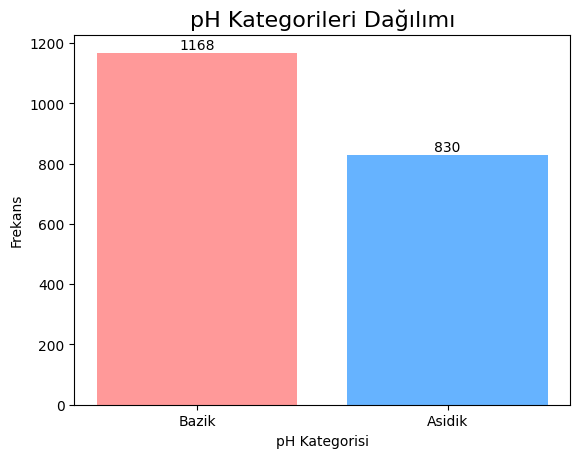

In [74]:
import matplotlib.pyplot as plt
category_counts = df0['ph_category'].value_counts()

# Sütun grafiği için verileri ayarlayın
categories = category_counts.index
counts = category_counts.values
colors = ['#ff9999', '#66b3ff', '#99ff99']  # Asidik, Bazik, Nötr

# Grafiği oluşturun
fig, ax = plt.subplots()

# Sütun grafiğini çizin
bars = ax.bar(categories, counts, color=colors)

# Renklerin açıklamasını ekleyin
for bar, color in zip(bars, colors):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', color='black')

# Başlık ve etiketler ekleyin
plt.title('pH Kategorileri Dağılımı', fontsize=16)
plt.xlabel('pH Kategorisi')
plt.ylabel('Frekans')

# Göster
plt.show()

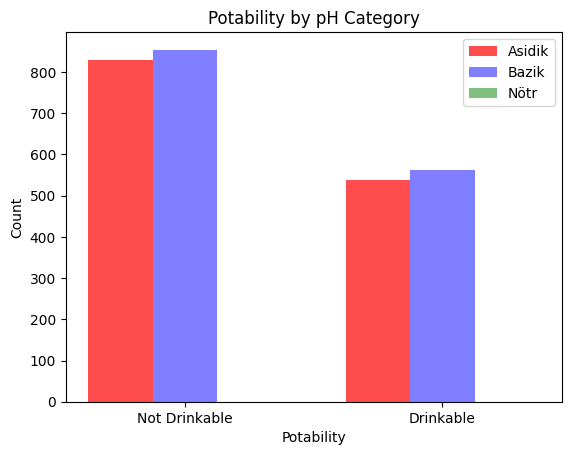

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df0 = pd.read_csv('waterpotability.csv')  

# pH değerine göre kategorileri belirleme
df0['ph_category'] = df0['ph'].apply(lambda x: 'Asidik' if x < 7 else ('Bazik' if x > 7 else 'Nötr'))

# NaN değerleri düşürme (opsiyonel)
df0.dropna(subset=['ph', 'Potability'], inplace=True)


acidic_potability_counts = df0[df0['ph_category'] == 'Asidik']['Potability'].value_counts().reindex([0, 1], fill_value=0)
basic_potability_counts = df0[df0['ph_category'] == 'Bazik']['Potability'].value_counts().reindex([0, 1], fill_value=0)
neutral_potability_counts = df0[df0['ph_category'] == 'Nötr']['Potability'].value_counts().reindex([0, 1], fill_value=0)

fig, ax = plt.subplots()

bar_width = 0.25
index = range(2)  # 0 ve 1 için

# Asidik su çubukları
ax.bar([i - bar_width for i in index], acidic_potability_counts, bar_width, color='red', alpha=0.7, label='Asidik')

# Bazik su çubukları
ax.bar(index, basic_potability_counts, bar_width, color='blue', alpha=0.5, label='Bazik')

# Nötr su çubukları
ax.bar([i + bar_width for i in index], neutral_potability_counts, bar_width, color='green', alpha=0.5, label='Nötr')

# Eksen etiketleri ve başlık
ax.set_xlabel('Potability')
ax.set_ylabel('Count')
ax.set_title('Potability by pH Category')
ax.set_xticks(index)
ax.set_xticklabels(['Not Drinkable', 'Drinkable'])
ax.legend()

# Grafiği göster
plt.show()


In [30]:
ph1=df1['ph'].mean()
ph1

7.0737832953812

In [31]:
sulfate1=df1['Sulfate'].mean()
sulfate1

332.5669902336656

In [32]:
triha1=df1['Trihalomethanes'].mean()
triha1

66.53968374070116

In [33]:
df1.fillna(value={'ph':ph1, 'Sulfate':sulfate1, 'Trihalomethanes':triha1}, inplace=True)
df1

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
250,9.445130,145.805402,13168.529156,9.444471,310.583374,592.659021,8.606397,77.577460,3.875165,1
251,9.024845,128.096691,19859.676476,8.016423,300.150377,451.143481,14.770863,73.778026,3.985251,1
252,7.073783,169.974849,23403.637304,8.519730,332.566990,475.573562,12.924107,50.861913,2.747313,1
253,6.800119,242.008082,39143.403329,9.501695,187.170714,376.456593,11.432466,73.777275,3.854940,1
254,7.174135,203.408935,20401.102461,7.681806,287.085679,315.549900,14.533510,74.405616,3.939896,1
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,332.566990,392.449580,19.903225,66.539684,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,332.566990,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,332.566990,402.883113,11.168946,77.488213,4.708658,1


In [34]:
df1.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [36]:
dframe=pd.concat([df0,df1])
dframe

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.085378,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,334.564290,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,334.564290,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,332.566990,392.449580,19.903225,66.539684,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,332.566990,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,332.566990,402.883113,11.168946,77.488213,4.708658,1


In [37]:
dframe.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [38]:
dframe.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080855,196.369496,22014.092526,7.122277,333.785123,426.205111,14.284970,66.395671,3.966786,0.390110
std,1.469958,32.879761,8768.570828,1.583085,36.145701,80.824064,3.308162,15.769901,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.085378,196.967627,20927.833607,7.130299,334.564290,421.884968,14.218338,66.303555,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


NİTELİKLERİN ORTALAMASI

In [39]:
dframe[dframe.columns].mean() #dframe columns nitelik isimlerini donduruyo

ph                     7.080855
Hardness             196.369496
Solids             22014.092526
Chloramines            7.122277
Sulfate              333.785123
Conductivity         426.205111
Organic_carbon        14.284970
Trihalomethanes       66.395671
Turbidity              3.966786
Potability             0.390110
dtype: float64

NİTELİKLERİN MEDYANLARI

In [40]:
dframe[dframe.columns].median()

ph                     7.085378
Hardness             196.967627
Solids             20927.833607
Chloramines            7.130299
Sulfate              334.564290
Conductivity         421.884968
Organic_carbon        14.218338
Trihalomethanes       66.303555
Turbidity              3.955028
Potability             0.000000
dtype: float64

NİTELİKLERİN MODLARI

In [41]:
for column in dframe.columns: #pd de mode fonks yoktu diye kednim st kutuphanesiyle aldım.
    print(column," \t \t ", st.mode(dframe[column]))

ph  	 	  7.085378435983544
Hardness  	 	  204.8904554713363
Solids  	 	  20791.318980747023
Chloramines  	 	  7.300211873184757
Sulfate  	 	  334.5642895786881
Conductivity  	 	  564.3086541722439
Organic_carbon  	 	  10.3797830780847
Trihalomethanes  	 	  66.30355527306088
Turbidity  	 	  2.9631353806316407
Potability  	 	  0


NİTELİKLERİN FREKANSLARININ GORSELLESTİRMESİ

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
for column in dframe.columns:
    counts = dframe[column].value_counts()
    print(counts)

ph
7.085378    314
7.073783    177
9.089421      1
1.757037      1
7.725192      1
           ... 
7.095569      1
3.928556      1
6.352973      1
5.999125      1
7.874671      1
Name: count, Length: 2787, dtype: int64
Hardness
204.890455    1
208.438593    1
230.766940    1
156.898917    1
186.353361    1
             ..
191.665998    1
244.846717    1
219.716109    1
208.106548    1
195.102299    1
Name: count, Length: 3276, dtype: int64
Solids
20791.318981    1
17248.618742    1
9727.761716     1
26738.525361    1
21440.738848    1
               ..
17328.161457    1
13858.703936    1
19345.791332    1
17915.085972    1
17404.177061    1
Name: count, Length: 3276, dtype: int64
Chloramines
7.300212    1
7.685370    1
5.943695    1
5.023143    1
7.832474    1
           ..
7.692417    1
9.179442    1
6.029641    1
4.793575    1
7.509306    1
Name: count, Length: 3276, dtype: int64
Sulfate
334.564290    488
332.566990    293
372.621943      1
330.127869      1
429.022312      1
       

In [44]:
counts = dframe['ph'].value_counts().to_dict()
temp_df = pd.DataFrame(counts , index=[0])
temp_df.head()

,7.085378,7.073783,9.089421,1.757037,7.725192,6.729191,5.085429,9.545271,6.246264,7.376449,...,7.399725,7.002480,5.345345,6.185951,6.070091,7.095569,3.928556,6.352973,5.999125,7.874671
0,314,177,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


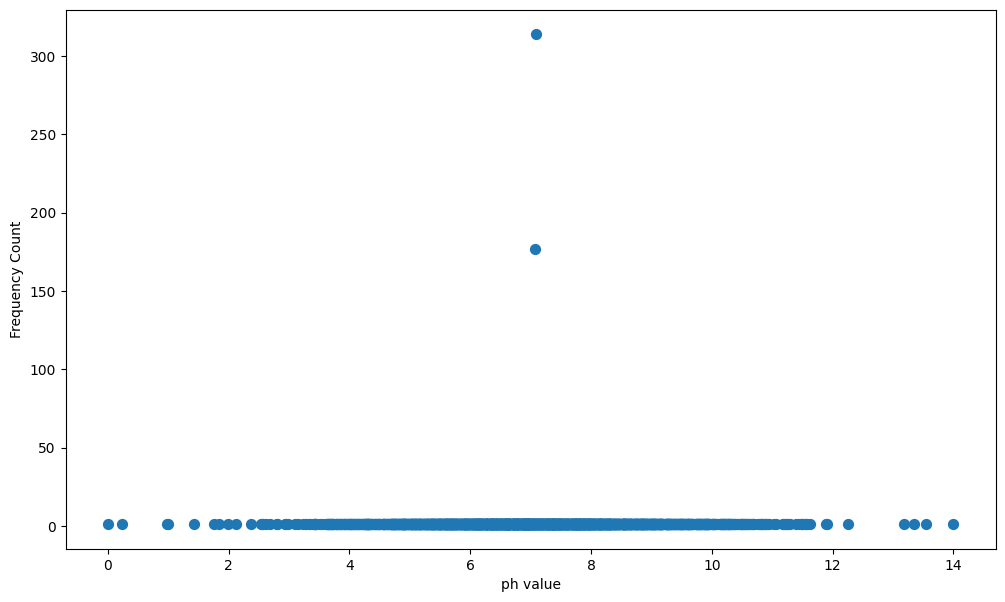

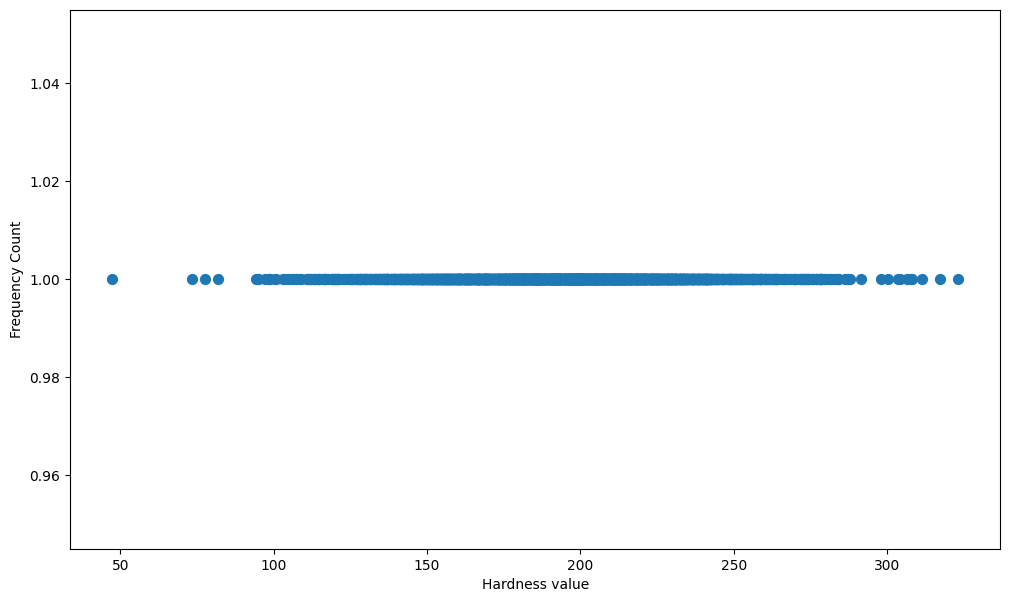

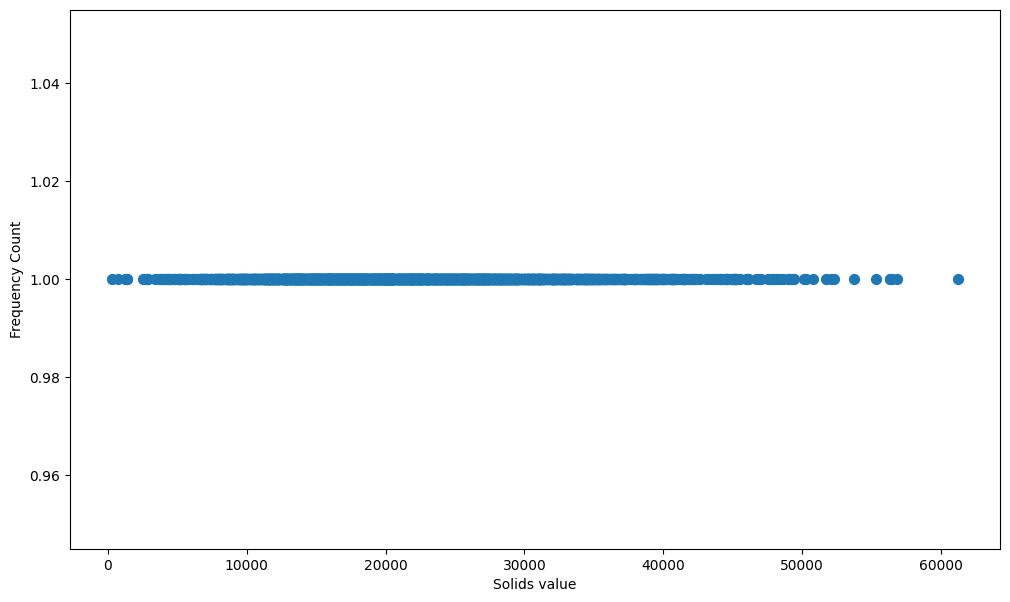

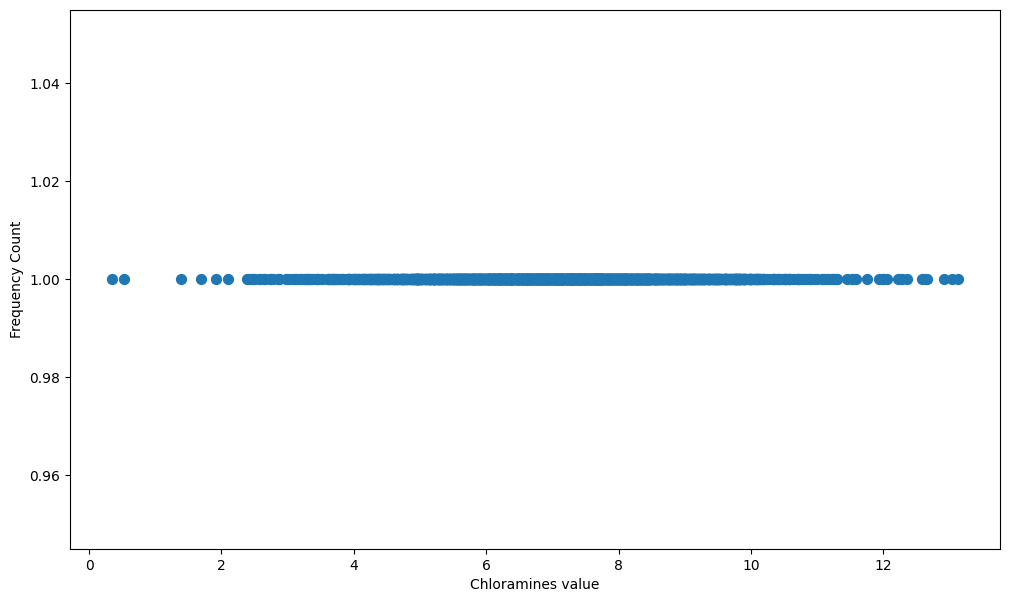

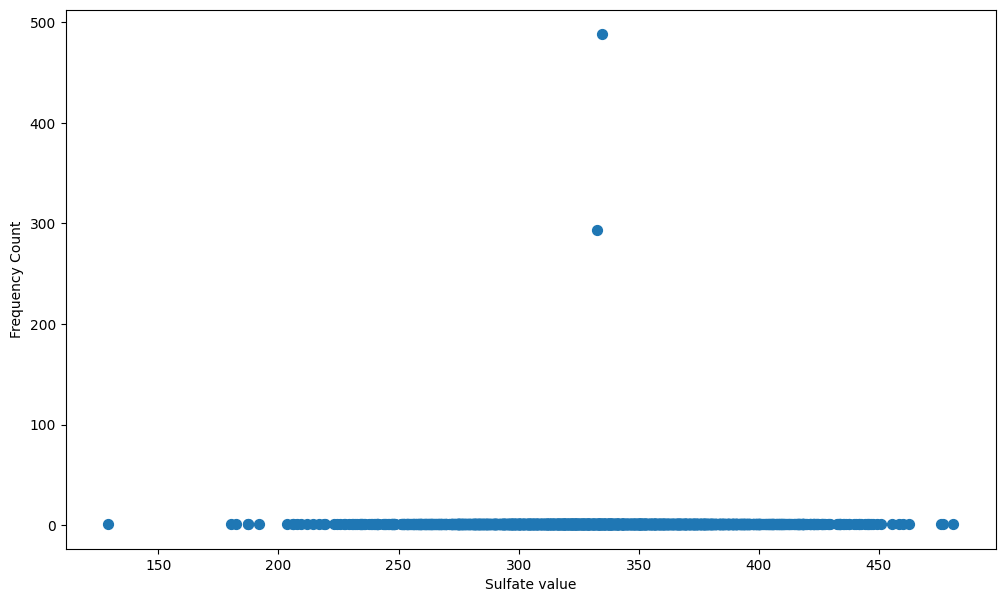

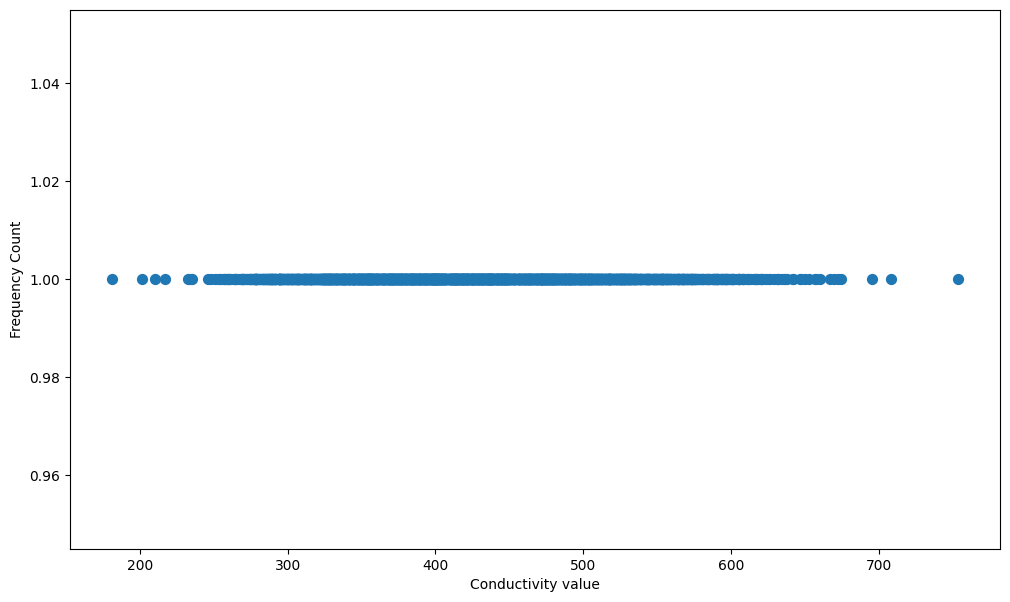

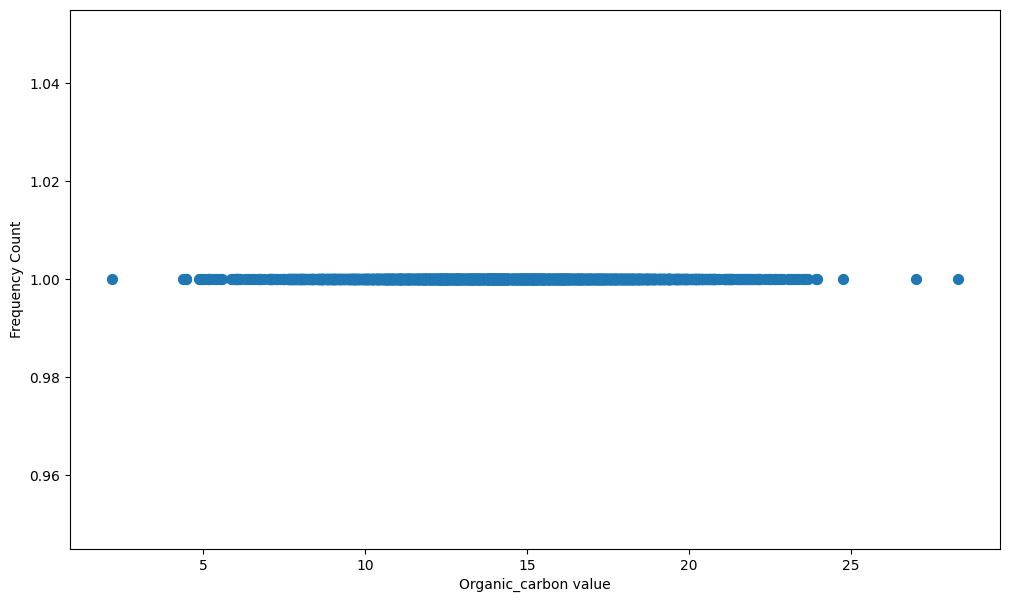

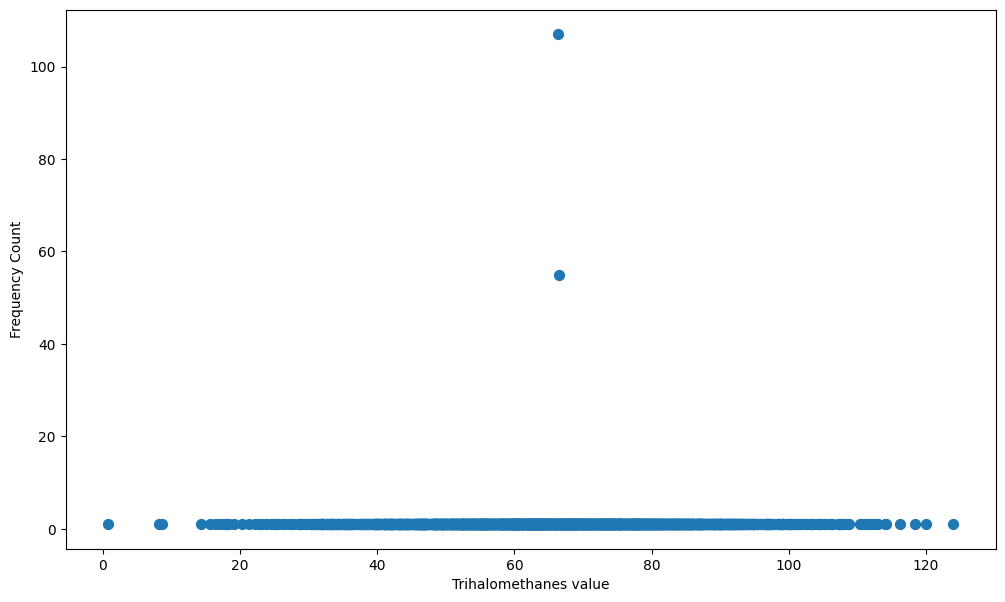

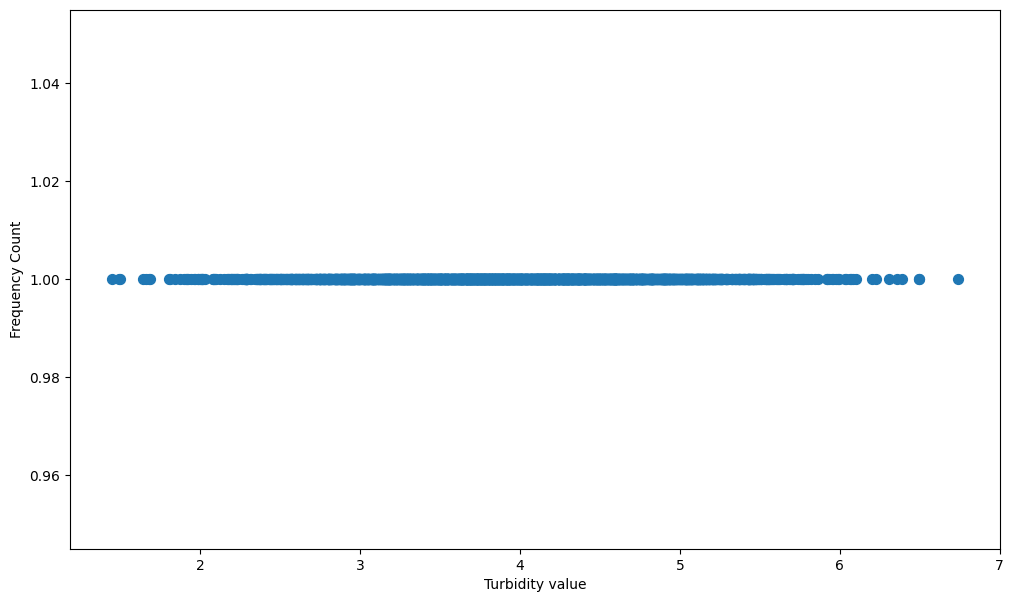

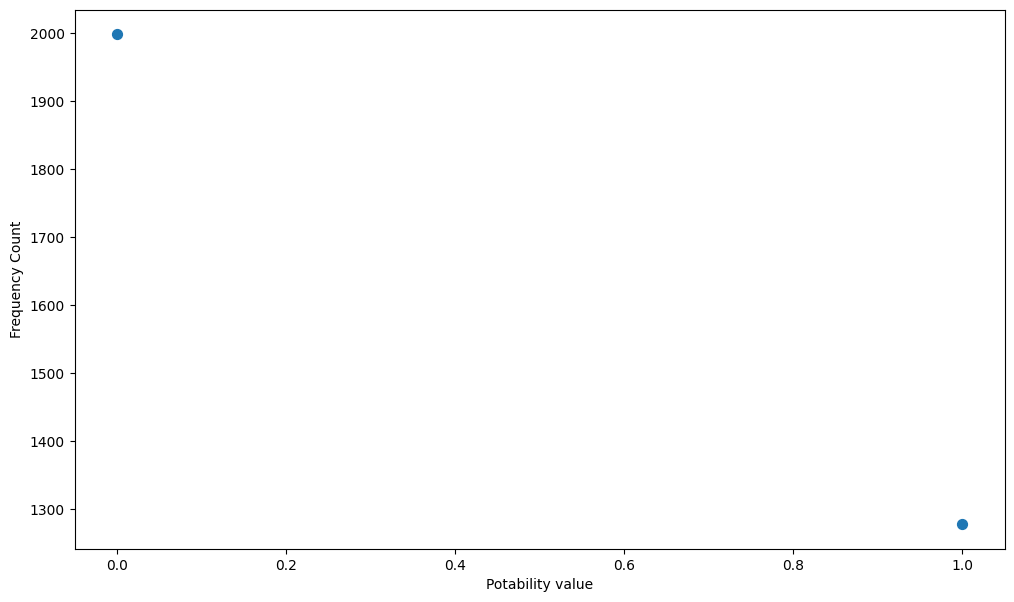

In [45]:
for column in dframe.columns:
    counts = dframe[column].value_counts().to_dict() #value_counts frekansları sayısal olarak gösteriyor.Bunları sözlüğe çeviriyoruz.
    temp_df = pd.DataFrame(counts , index=[0])#sözlük yapısındaki frekansları görselleştirme yapmak için dataframe' e çeviriyoruz.
    
    plt.figure(figsize=(12,7)) #sablonu olustrdum
    plt.scatter(temp_df.columns,temp_df.iloc[0],s=50 )  # scatter ile noktasal yaptım. 
    
    xlabel = column + ' value'
    plt.xlabel(xlabel)
    plt.ylabel('Frequency Count')

    plt.show()



In [46]:
for col in dframe.columns:
    Q3 = np.quantile(dframe[col], 0.75)
    Q1 = np.quantile(dframe[col], 0.25)
    IQR = Q3 - Q1
    
    print(col, 'niteliğinin IQR(Q3-Q1) değeri:\t ',Q3-Q1,'(',Q3,'-',Q1,')')

ph niteliğinin IQR(Q3-Q1) değeri:	  1.5923771193627791 ( 7.870049755247176 - 6.277672635884397 )
Hardness niteliğinin IQR(Q3-Q1) değeri:	  39.81691833734635 ( 216.66745621487073 - 176.85053787752437 )
Solids niteliğinin IQR(Q3-Q1) değeri:	  11666.071830473964 ( 27332.762127438615 - 15666.69029696465 )
Chloramines niteliğinin IQR(Q3-Q1) değeri:	  1.9874662766177282 ( 8.114887032109028 - 6.1274207554913 )
Sulfate niteliğinin IQR(Q3-Q1) değeri:	  33.29111857629181 ( 350.38575630240354 - 317.0946377261117 )
Conductivity niteliğinin IQR(Q3-Q1) değeri:	  116.05789036926546 ( 481.7923044877282 - 365.7344141184627 )
Organic_carbon niteliğinin IQR(Q3-Q1) değeri:	  4.491850210230368 ( 16.557651543843434 - 12.065801333613067 )
Trihalomethanes niteliğinin IQR(Q3-Q1) değeri:	  20.01895367565514 ( 76.66660934716015 - 56.64765567150501 )
Turbidity niteliğinin IQR(Q3-Q1) değeri:	  1.060608917672198 ( 4.50031978728511 - 3.439710869612912 )
Potability niteliğinin IQR(Q3-Q1) değeri:	  1.0 ( 1.0 - 0.0 )


In [47]:
for col in dframe.columns:
    Q3 = np.quantile(dframe[col], 0.75)
    Q1 = np.quantile(dframe[col], 0.25)
    IQR = Q3 - Q1
    
    min = Q1 - 1.5*IQR
    max = Q3 - 1.5*IQR
    print(dframe[(dframe[col]>max)&(dframe[col]<min)])#dframe tablosunun içinde maxtan büyük minden küçük olan aykırı değerleri yazdırıyorum.
    

Empty DataFrame
Columns: [ph, Hardness, Solids, Chloramines, Sulfate, Conductivity, Organic_carbon, Trihalomethanes, Turbidity, Potability]
Index: []
Empty DataFrame
Columns: [ph, Hardness, Solids, Chloramines, Sulfate, Conductivity, Organic_carbon, Trihalomethanes, Turbidity, Potability]
Index: []
Empty DataFrame
Columns: [ph, Hardness, Solids, Chloramines, Sulfate, Conductivity, Organic_carbon, Trihalomethanes, Turbidity, Potability]
Index: []
Empty DataFrame
Columns: [ph, Hardness, Solids, Chloramines, Sulfate, Conductivity, Organic_carbon, Trihalomethanes, Turbidity, Potability]
Index: []
Empty DataFrame
Columns: [ph, Hardness, Solids, Chloramines, Sulfate, Conductivity, Organic_carbon, Trihalomethanes, Turbidity, Potability]
Index: []
Empty DataFrame
Columns: [ph, Hardness, Solids, Chloramines, Sulfate, Conductivity, Organic_carbon, Trihalomethanes, Turbidity, Potability]
Index: []
Empty DataFrame
Columns: [ph, Hardness, Solids, Chloramines, Sulfate, Conductivity, Organic_carbon, 

In [48]:
Q3 = np.quantile(dframe['ph'], 0.75)
Q1 = np.quantile(dframe['ph'], 0.25)
IQR = Q3 - Q1

min = Q1 - 1.5*IQR
max = Q3 - 1.5*IQR

dframe[(dframe['ph']>max)&(dframe['ph']<min)]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability


In [49]:
dframe.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080855,196.369496,22014.092526,7.122277,333.785123,426.205111,14.284970,66.395671,3.966786,0.390110
std,1.469958,32.879761,8768.570828,1.583085,36.145701,80.824064,3.308162,15.769901,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.085378,196.967627,20927.833607,7.130299,334.564290,421.884968,14.218338,66.303555,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


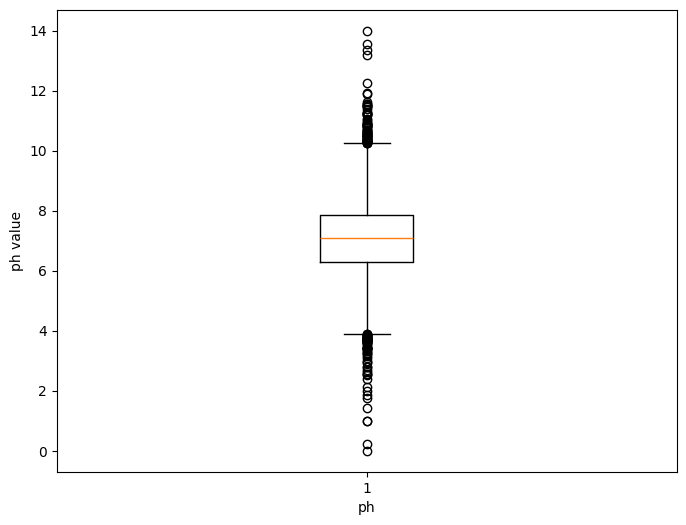

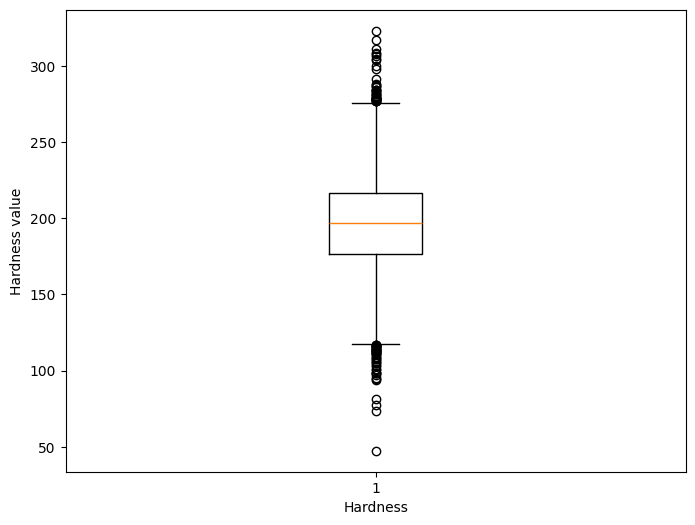

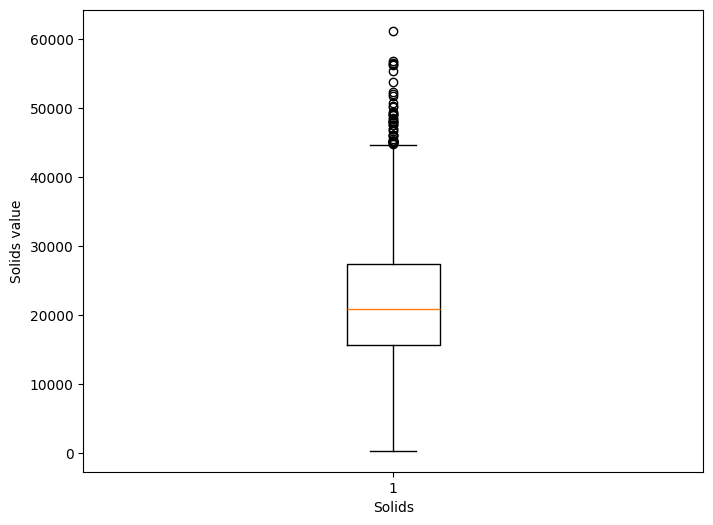

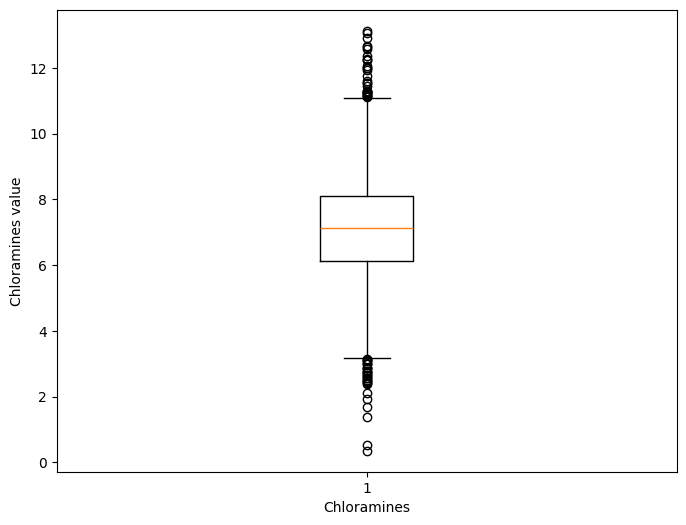

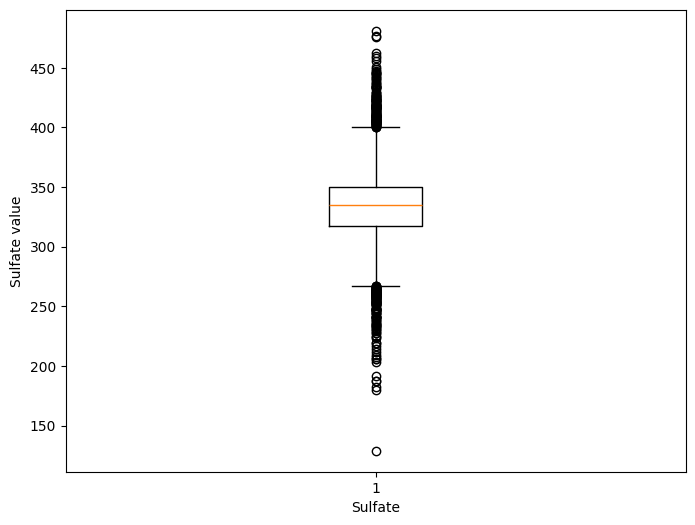

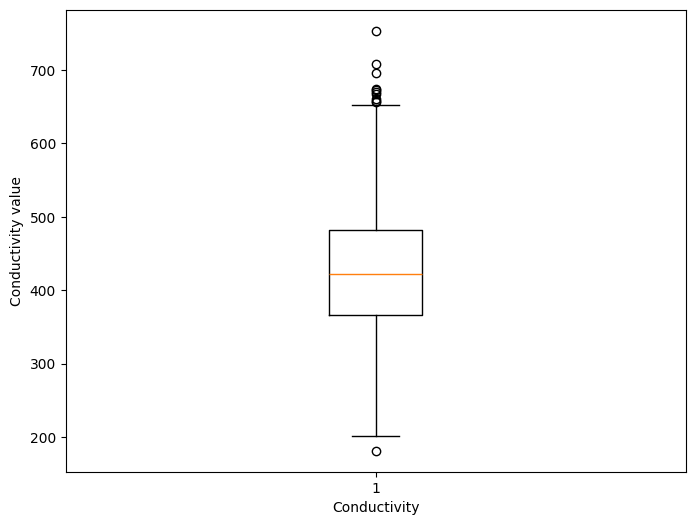

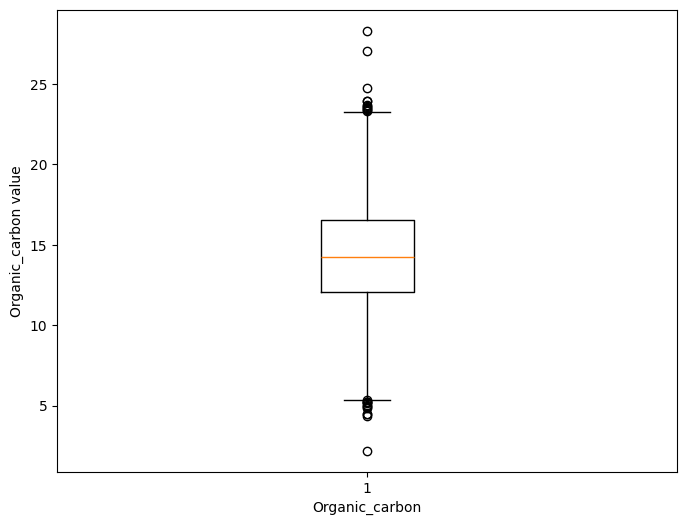

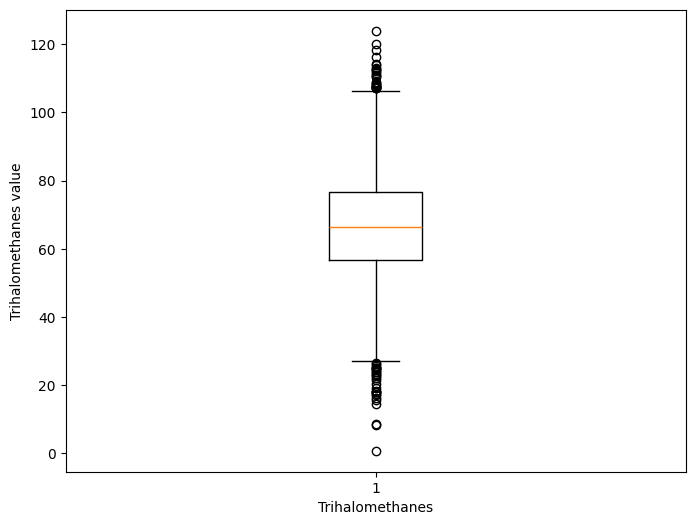

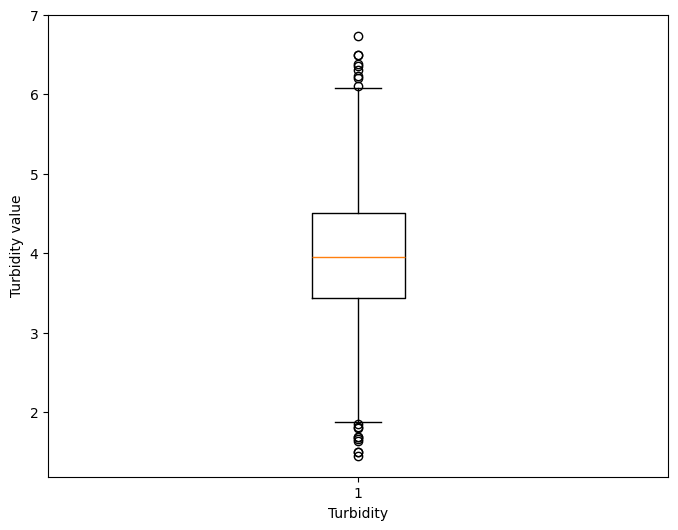

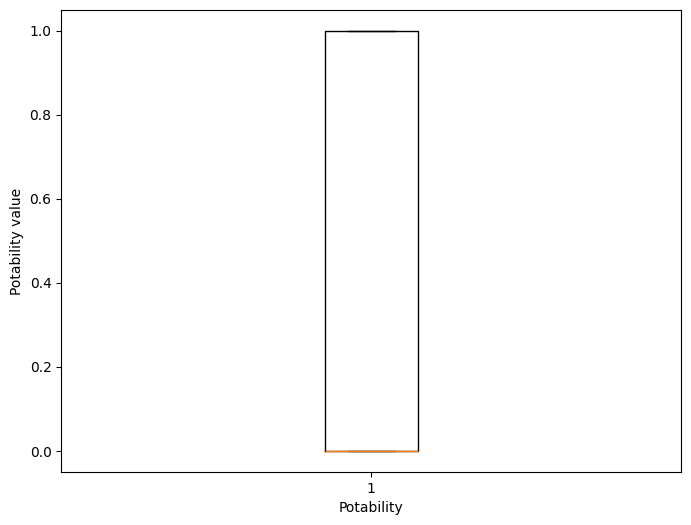

In [50]:
for col in dframe.columns:   
    plt.figure(figsize=(8,6))
    #sns.boxplot(x = dframe[col], y=dframe.Potability)
    plt.boxplot(x = dframe[col])
    
    ylabel = col + ' value'
    plt.xlabel(col)
    plt.ylabel(ylabel)
    
    plt.show()


In [51]:
print('Varyanslar:\n',dframe.var(axis=0))

Varyanslar:
 ph                 2.160775e+00
Hardness           1.081079e+03
Solids             7.688783e+07
Chloramines        2.506158e+00
Sulfate            1.306512e+03
Conductivity       6.532529e+03
Organic_carbon     1.094394e+01
Trihalomethanes    2.486898e+02
Turbidity          6.089967e-01
Potability         2.379968e-01
dtype: float64


In [52]:
print('Standart Sapmalar:\n',dframe.std(axis=0))

Standart Sapmalar:
 ph                    1.469958
Hardness             32.879761
Solids             8768.570828
Chloramines           1.583085
Sulfate              36.145701
Conductivity         80.824064
Organic_carbon        3.308162
Trihalomethanes      15.769901
Turbidity             0.780382
Potability            0.487849
dtype: float64


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [54]:
dframe.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.085378,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,334.564290,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,334.564290,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [55]:
X = dframe.drop('Potability', axis=1)
y = dframe['Potability']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", accuracy_logreg)

Logistic Regression Accuracy: 0.6326219512195121


In [58]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print("SVC Accuracy:", accuracy_svc)

SVC Accuracy: 0.6326219512195121


In [59]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

Random Forest Accuracy: 0.7652439024390244


In [60]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression için parametre grid'i
logreg_param_grid = {'C': [0.1, 1, 10]}

# SVC için parametre grid'i
svc_param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Random Forest için parametre grid'i
rf_param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]}

In [61]:
# GridSearchCV ile parametre optimizasyonu ve en iyi modeli bulma
logreg_grid = GridSearchCV(LogisticRegression(), logreg_param_grid)
logreg_grid.fit(X_train, y_train)
best_logreg = logreg_grid.best_estimator_
y_pred_logreg = best_logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Best Logistic Regression Model:", best_logreg)
print("Logistic Regression Accuracy:", accuracy_logreg)

Best Logistic Regression Model: LogisticRegression(C=0.1)
Logistic Regression Accuracy: 0.6310975609756098


In [63]:
rf_grid = GridSearchCV(RandomForestClassifier(), rf_param_grid)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_

In [62]:
y_pred_rf = best_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Best Random Forest Model:", best_rf)
print("Random Forest Accuracy:", accuracy_rf)

Best Random Forest Model: RandomForestClassifier(max_depth=10)
Random Forest Accuracy: 0.7698170731707317


In [67]:
# Modeli kaydetme
model_path = 'random_forest_model.joblib'
joblib.dump(rf, model_path)
print(f"Model saved to {model_path}")


Model saved to random_forest_model.joblib


In [69]:
X_test.iloc[0], y_test.iloc[0]

(ph                     4.439096
 Hardness             190.153449
 Solids             20864.340465
 Chloramines            2.386653
 Sulfate              332.566990
 Conductivity         515.631205
 Organic_carbon        18.081003
 Trihalomethanes       63.363082
 Turbidity              3.844231
 Name: 2449, dtype: float64,
 1)